In [11]:
import sys
mins = 60

from hmmlearn import hmm

import nilmtk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import warnings
import sys
sys.path.append("../code/")
sys.path.append("../code/ddsc_files/")

In [12]:
warnings.filterwarnings("ignore")



from nilmtk import *
import os
import nilmtk

metadata_df = pd.read_csv("./metadata.csv",index_col=0)
feeds = {'use':'aggregate',
        'air1':'hvac',
         'clotheswasher1':'wm',
         'dishwasher1':'dw',
         'microwave1':'mw',
         'refrigerator1':'fridge',
         'oven1':'oven',
        }

feed_r = {v:k for k, v in feeds.iteritems()}
city = 'Austin'
year = 2015


st = pd.HDFStore(os.path.expanduser("~/all.h5"), mode='r')

city_data = metadata_df[metadata_df['city'] == city]
city_homes = city_data.index.values.astype('int')

from common import APPLIANCES_ORDER

models = {}

In [13]:
from ddsc import train_ddsc

In [14]:
import pickle

In [15]:
tensor = pickle.load(open("1H-input.pkl",'r'))

In [20]:
%matplotlib inline
m = 3
d = []
for i in range(1, 7):
    temp = pd.DataFrame(tensor[:m, i, :, :].reshape(m, 365 * 24).T).fillna(method='pad').astype('float32')
    temp = temp.T.fillna(method='pad').T
    d.append(temp.values)

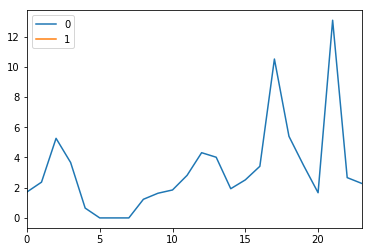

In [21]:
pd.DataFrame(tensor[range(3, 5), 1, 0, :]).T.plot()

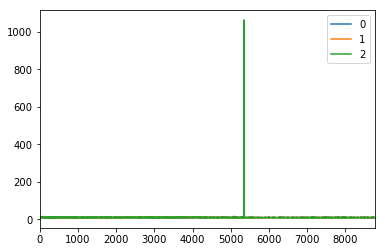

In [23]:
pd.DataFrame(d[5]).plot()

In [24]:
big_a_star, big_b_tilde, all_b = train_ddsc(d, 2)

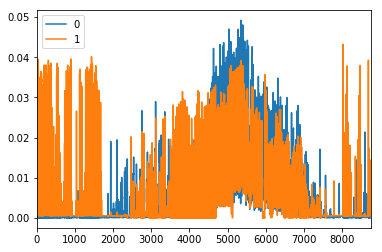

In [25]:
pd.DataFrame(all_b[0]).plot()

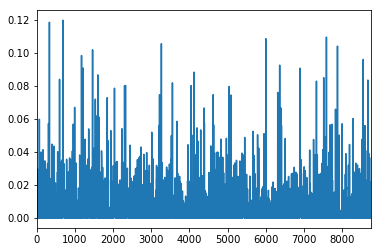

In [26]:
pd.Series(big_b_tilde[:, 0]).plot()

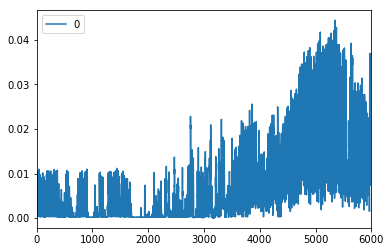

In [136]:
pd.DataFrame(all_b[0]).head(6000).plot()

In [27]:
from ddsc import run_ddsc
agg_10 = pd.DataFrame(tensor[10, 0, :, :].reshape(1, 365*24).T).fillna(method='pad').astype('float32').values
agg_100 = pd.DataFrame(tensor[100, 0, :, :].reshape(1, 365*24).T).fillna(method='pad').astype('float32').values


pred_10 = run_ddsc(agg_10, big_b_tilde, big_a_star, all_b)
pred_100 = run_ddsc(agg_100, big_b_tilde, big_a_star, all_b)

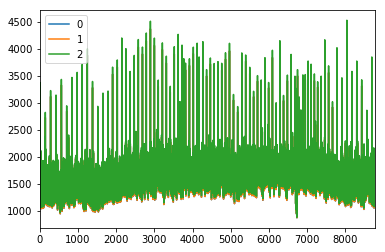

In [48]:
pd.DataFrame(pred_10[1]).plot()

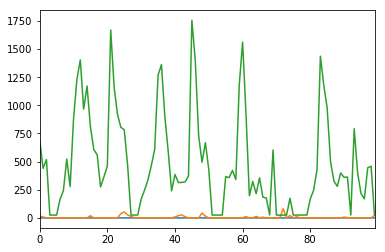

In [32]:
pd.Series(tensor[10, 1, :, :].reshape(365*24)).head(100).plot()
pd.DataFrame(pred_10[2])[1].head(100).plot()
pd.DataFrame(pred_100[0])[1].head(100).plot()

In [10]:
pd.DataFrame(pred_10[0])[1].head(2000).plot()
pd.DataFrame(pred_10[0])[0].head(2000).plot()

#pd.DataFrame(pred_100[1])[1].plot()

NameError: name 'pred_10' is not defined

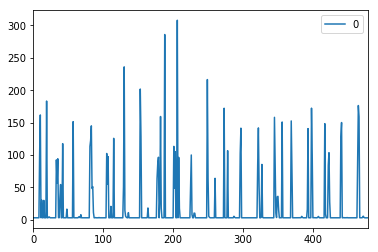

In [33]:
pd.DataFrame(o[3]).plot()

In [46]:
tensor = pickle.load(open('hourly.pkl','r'))

In [ ]:
from common import APPLIANCES_ORDER

In [75]:
pred_fhmm = {}
index = pd.DatetimeIndex(start="2015", freq='1H', periods=365*24)